## **Task 2 : Prediction using Unsupervised ML**

**Question:- Predict the optimum number of clusters in Iris dataset and represent it visually.**

## **Step 1 :- Importing the libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# **Step 2 :- Importing dataset**

In [ ]:
df = pd.read_csv('/content/Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
#display the shape of our dataset
df.shape

(150, 6)

In [ ]:
#describe() method use to see percentiles,mean,std,max,count of the given dataset.
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
#species of our dataset
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

## **Step 3 :- Data Visualization of our Dataset**

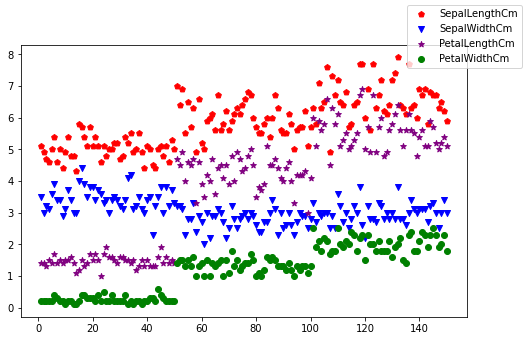

In [ ]:
#Here is how data is displayed in a 2 dimensional space:

fig = plt.figure(figsize=(8,5))
plt.scatter(x = df.Id, y = df.SepalLengthCm,c = 'red', marker = "p")
plt.scatter(x = df.Id, y = df.SepalWidthCm,c = 'blue', marker = "v")
plt.scatter(x = df.Id, y = df.PetalLengthCm, c = 'purple',marker = "*")
plt.scatter(x = df.Id, y = df.PetalWidthCm,c = 'green', marker = "o")

fig.legend(labels=['SepalLengthCm','SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'])

## **Step 4 :- Finding the optimum number of clusters by using Elbow graph.**

In [ ]:
# Calculating the within-cluster sum of square
from sklearn.cluster import KMeans
df = pd.DataFrame(df)
iris_df = df.drop(columns= ['Species' ,'Id'] )
within_cluster_sum_of_square = []

In [ ]:
clusters_range = range(1,15)
for k in clusters_range:
    km = KMeans(n_clusters=k)
    km = km.fit(iris_df)
    # inertia method returns wcss for that model
    within_cluster_sum_of_square.append(km.inertia_)

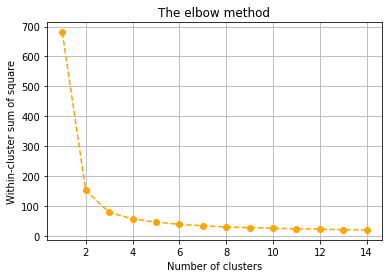

In [ ]:
# Now we are going to plot the "within-cluster sum of square(wcss)" 
plt.plot(clusters_range, within_cluster_sum_of_square, 'go--', color='orange')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster sum of square')
plt.grid()
plt.show()

## **Step 5 :- Initializing K-means Clusters**

In [ ]:
#Creating the kmeans clusters
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 5)
y_kmeans = kmeans.fit_predict(x)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

## **Visualizing the Clusters**

**By using 3 Iris flower dataset we are going to visualize our clusters**

,Color,Iris species
0,purple,setosa
1,green,versicolor
2,yellow,virginica


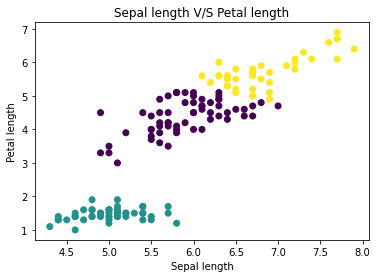

In [ ]:
#Visualization of Sepal length V/S Petal length
plt.scatter(x[:, 0], x[:, 2], c=y_kmeans)
plt.xlabel('Sepal length')
plt.ylabel('Petal length')
plt.title('Sepal length V/S Petal length')

pd.DataFrame({'Color':['purple', 'green', 'yellow'], 'Iris species':['setosa', 'versicolor', 'virginica']})

,Color,Iris species
0,purple,setosa
1,green,versicolor
2,yellow,virginica


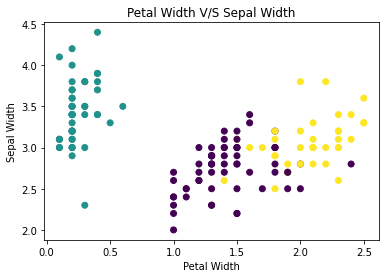

In [ ]:
#Visualization of Petal Width V/S Sepal Width
plt.scatter(x[:, 3], x[:, 1], c=y_kmeans)
plt.xlabel('Petal Width')
plt.ylabel('Sepal Width')
plt.title('Petal Width V/S Sepal Width')

pd.DataFrame({'Color':['purple', 'green', 'yellow'], 'Iris species':['setosa', 'versicolor', 'virginica']})

## **Step 6 - Visualization of Clusters**

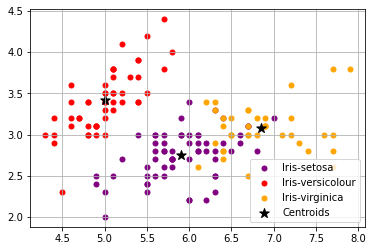

In [ ]:
x = iris_df.iloc[:, [0, 1, 2, 3]].values
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 25, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 25, c = 'red', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 25, c = 'orange', label = 'Iris-virginica')
#plot the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'black',marker='*', label = 'Centroids')
plt.legend()
plt.grid()
plt.show()

## ***Task 2 Completed...!***
### **Finally, we get optimum number of clusters in Iris dataset and represented it visually.**
---

---



